## 서울시 따릉이 분석

In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import platform
from sklearn import preprocessing

if platform.system() == 'Darwin': 
        plt.rc('font', family='AppleGothic') 
elif platform.system() == 'Windows':
        plt.rc('font', family='Malgun Gothic') 
else :
    plt.rc('font', family='Malgun Gothic') 
plt.rcParams['axes.unicode_minus'] = False 


import warnings
warnings.filterwarnings("ignore")

data= pd.read_csv('공공자전거 대여이력 정보_2021.01.csv',  encoding='cp949')

In [172]:
data.head(10)

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
0,SPB-53145,2021-01-02 20:50:36,3,중랑센터,0,2021-01-02 21:15:41,668,서울축산농협(장안지점),0,25,0.00
1,SPB-53074,2021-01-04 16:02:12,3,중랑센터,0,2021-01-04 16:17:06,668,서울축산농협(장안지점),0,14,0.00
2,SPB-50952,2021-01-13 21:02:05,3,중랑센터,0,2021-01-13 21:14:04,668,서울축산농협(장안지점),0,11,1853.99
3,SPB-52380,2021-01-14 21:02:55,3,중랑센터,0,2021-01-14 21:13:41,668,서울축산농협(장안지점),0,10,0.00
4,SPB-52380,2021-01-18 18:02:08,3,중랑센터,0,2021-01-18 18:15:22,540,군자역 7번출구 베스트샵 앞,0,13,2291.05
5,SPB-30541,2021-01-19 18:03:00,3,중랑센터,0,2021-01-19 18:05:28,594,중랑물재생센터(서울새활용플라자),0,2,0.00
6,SPB-53160,2021-01-20 18:01:19,3,중랑센터,0,2021-01-20 18:12:19,668,서울축산농협(장안지점),0,11,1508.98
7,SPB-04151,2021-01-22 17:46:34,3,중랑센터,7,2021-01-22 18:03:11,529,장한평역 8번 출구 앞,1,16,1220.00
8,SPB-30145,2021-01-22 17:54:26,3,중랑센터,0,2021-01-22 18:15:14,668,서울축산농협(장안지점),0,20,1991.86
9,SPB-53403,2021-01-25 20:37:16,3,중랑센터,0,2021-01-25 21:11:00,668,서울축산농협(장안지점),0,33,1977.60


# 월별
1월 

In [173]:
data['대여일시'][0]

'2021-01-02 20:50:36'

In [174]:
data['대여일시'] = pd.to_datetime(data['대여일시'], format='%Y-%m-%d %H:%M:%S', errors='raise')
data['반납일시'] = pd.to_datetime(data['반납일시'], format='%Y-%m-%d %H:%M:%S', errors='raise')

In [175]:
data['대여일시'][0]

Timestamp('2021-01-02 20:50:36')

In [176]:
data['월'] = pd.DatetimeIndex(data['대여일시']).month
data['월']

0         1
1         1
2         1
3         1
4         1
         ..
806498    1
806499    1
806500    1
806501    1
806502    1
Name: 월, Length: 806503, dtype: int64

In [177]:
data['월'].value_counts()

1    806503
Name: 월, dtype: int64

# 일별

In [178]:
data['일'] = pd.DatetimeIndex(data['대여일시']).day
data['일']

0          2
1          4
2         13
3         14
4         18
          ..
806498    24
806499    25
806500    27
806501    31
806502    31
Name: 일, Length: 806503, dtype: int64

In [179]:
per_day=data['일'].value_counts(sort=False)
per_day

1     22119
2     23463
3     21656
4     32732
5     28819
6     22104
7      5471
8      7896
9      9017
10    11042
11    19366
12    12739
13    19652
14    32375
15    32218
16    22370
17    17951
18    17983
19    26706
20    36728
21    17329
22    34749
23    43127
24    49763
25    54324
26    26066
27    45370
28    22598
29    24228
30    28198
31    38344
Name: 일, dtype: int64

In [180]:
data

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,월,일
0,SPB-53145,2021-01-02 20:50:36,3,중랑센터,0,2021-01-02 21:15:41,668,서울축산농협(장안지점),0,25,0.00,1,2
1,SPB-53074,2021-01-04 16:02:12,3,중랑센터,0,2021-01-04 16:17:06,668,서울축산농협(장안지점),0,14,0.00,1,4
2,SPB-50952,2021-01-13 21:02:05,3,중랑센터,0,2021-01-13 21:14:04,668,서울축산농협(장안지점),0,11,1853.99,1,13
3,SPB-52380,2021-01-14 21:02:55,3,중랑센터,0,2021-01-14 21:13:41,668,서울축산농협(장안지점),0,10,0.00,1,14
4,SPB-52380,2021-01-18 18:02:08,3,중랑센터,0,2021-01-18 18:15:22,540,군자역 7번출구 베스트샵 앞,0,13,2291.05,1,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...
806498,SPB-81270,2021-01-24 20:13:33,9999,상담센터,0,2021-01-24 20:56:28,2908,광운대학교 중앙도서관,99,42,3730.00,1,24
806499,SPB-39891,2021-01-25 12:10:06,9999,상담센터,0,2021-01-25 12:35:20,626,군자교 서측 녹지대,0,25,3680.00,1,25
806500,SPB-32679,2021-01-27 14:47:18,9999,상담센터,0,2021-01-27 15:12:45,2299,한전아트센터 앞,0,25,2471.37,1,27
806501,SPB-80712,2021-01-31 14:39:45,9999,상담센터,0,2021-01-31 15:46:49,175,홍연2교옆,99,67,4050.00,1,31


# 일별 이용자수 시각화

In [181]:
df = pd.DataFrame(per_day)
df.columns=['users']
df

,users
1,22119
2,23463
3,21656
4,32732
5,28819
6,22104
7,5471
8,7896
9,9017
10,11042


Text(0.5, 1.0, '일별 이용현황')

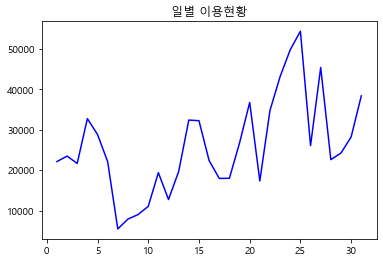

In [182]:
plt.plot(df.index,df.users, color='blue')
plt.title('일별 이용현황')

# 시간별

In [183]:
data['대여'] = pd.DatetimeIndex(data['대여일시']).hour
data['반납'] = pd.DatetimeIndex(data['반납일시']).hour
data['반납']

0         21
1         16
2         21
3         21
4         18
          ..
806498    20
806499    12
806500    15
806501    15
806502    16
Name: 반납, Length: 806503, dtype: int64

In [184]:
per_hour=data['대여'].value_counts(sort=False)  
per_hour2=data['반납'].value_counts(sort=False)  

per_hour

0     12528
1      9993
2      6900
3      4991
4      4338
5      5944
6     11595
7     27967
8     52632
9     30628
10    26141
11    34880
12    43401
13    48457
14    53756
15    58149
16    59871
17    67785
18    75131
19    49514
20    42378
21    41238
22    23140
23    15146
Name: 대여, dtype: int64

In [185]:
df2 = pd.concat([per_hour,per_hour2],axis=1)
df2.columns=['대여건수','반납건수']
df2

,대여건수,반납건수
0,12528,14148
1,9993,10743
2,6900,7897
3,4991,5607
4,4338,4600
5,5944,5555
6,11595,9730
7,27967,22350
8,52632,52632
9,30628,31365


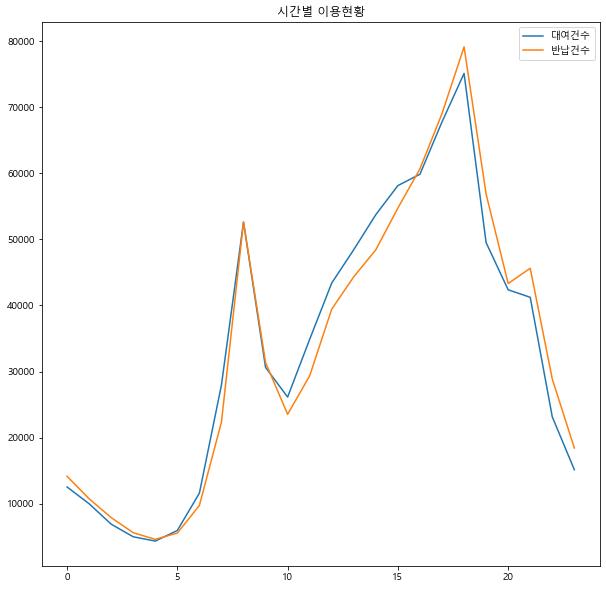

In [186]:
fig = plt.figure(figsize=(10,10)) 
fig.set_facecolor('white') 
ax = fig.add_subplot() 
 
ax.plot(df2.index,df2['대여건수'],label='대여건수') 
ax.plot(df2.index,df2['반납건수'],label='반납건수') 
 
ax.legend() 
 
plt.title('시간별 이용현황') 
plt.show()

# 시간별 이동거리, 이동시간


In [187]:
data

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,월,일,대여,반납
0,SPB-53145,2021-01-02 20:50:36,3,중랑센터,0,2021-01-02 21:15:41,668,서울축산농협(장안지점),0,25,0.00,1,2,20,21
1,SPB-53074,2021-01-04 16:02:12,3,중랑센터,0,2021-01-04 16:17:06,668,서울축산농협(장안지점),0,14,0.00,1,4,16,16
2,SPB-50952,2021-01-13 21:02:05,3,중랑센터,0,2021-01-13 21:14:04,668,서울축산농협(장안지점),0,11,1853.99,1,13,21,21
3,SPB-52380,2021-01-14 21:02:55,3,중랑센터,0,2021-01-14 21:13:41,668,서울축산농협(장안지점),0,10,0.00,1,14,21,21
4,SPB-52380,2021-01-18 18:02:08,3,중랑센터,0,2021-01-18 18:15:22,540,군자역 7번출구 베스트샵 앞,0,13,2291.05,1,18,18,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806498,SPB-81270,2021-01-24 20:13:33,9999,상담센터,0,2021-01-24 20:56:28,2908,광운대학교 중앙도서관,99,42,3730.00,1,24,20,20
806499,SPB-39891,2021-01-25 12:10:06,9999,상담센터,0,2021-01-25 12:35:20,626,군자교 서측 녹지대,0,25,3680.00,1,25,12,12
806500,SPB-32679,2021-01-27 14:47:18,9999,상담센터,0,2021-01-27 15:12:45,2299,한전아트센터 앞,0,25,2471.37,1,27,14,15
806501,SPB-80712,2021-01-31 14:39:45,9999,상담센터,0,2021-01-31 15:46:49,175,홍연2교옆,99,67,4050.00,1,31,14,15


In [188]:
dfdf = data[['대여', '이용시간','이용거리']]
dfdf.columns=['대여시간','이용시간','이용거리']
dfdf

,대여시간,이용시간,이용거리
0,20,25,0.00
1,16,14,0.00
2,21,11,1853.99
3,21,10,0.00
4,18,13,2291.05
...,...,...,...
806498,20,42,3730.00
806499,12,25,3680.00
806500,14,25,2471.37
806501,14,67,4050.00


In [189]:
dfdf2 =pd.pivot_table(dfdf, index = ['대여시간'], values = ['이용시간','이용거리'],aggfunc = 'mean')
dfdf2

,이용거리,이용시간
대여시간,,
0,2513.208137,20.303321
1,2556.556680,20.685480
2,2653.223955,20.568841
3,2497.831056,19.620317
4,2511.255339,18.811664
5,2090.032113,16.706258
6,2331.284749,17.502889
7,2315.299515,16.697644
8,1904.090278,14.436940


In [190]:
dfdf=pd.concat([dfdf2,df2['대여건수'],df2['반납건수']],axis=1) 
dfdf

,이용거리,이용시간,대여건수,반납건수
0,2513.208137,20.303321,12528,14148
1,2556.556680,20.685480,9993,10743
2,2653.223955,20.568841,6900,7897
3,2497.831056,19.620317,4991,5607
4,2511.255339,18.811664,4338,4600
5,2090.032113,16.706258,5944,5555
6,2331.284749,17.502889,11595,9730
7,2315.299515,16.697644,27967,22350
8,1904.090278,14.436940,52632,52632
9,2062.640890,18.713987,30628,31365


In [191]:
x = dfdf.values 
scaler = preprocessing.MinMaxScaler()
x_scale = scaler.fit_transform(x)
df_new = pd.DataFrame(x_scale)
df_new.columns=['이용거리','이용시간','대여건수','반납건수']
df_new

,이용거리,이용시간,대여건수,반납건수
0,0.385164,0.294999,0.115689,0.128089
1,0.412575,0.314217,0.079881,0.082410
2,0.473701,0.308351,0.036190,0.044230
3,0.375441,0.260653,0.009224,0.013509
4,0.383929,0.219989,0.000000,0.000000
5,0.117577,0.114116,0.022686,0.012812
6,0.270128,0.154176,0.102510,0.068820
7,0.260020,0.113683,0.333776,0.238121
8,0.000000,0.000000,0.682186,0.644362
9,0.100256,0.215077,0.371364,0.359059


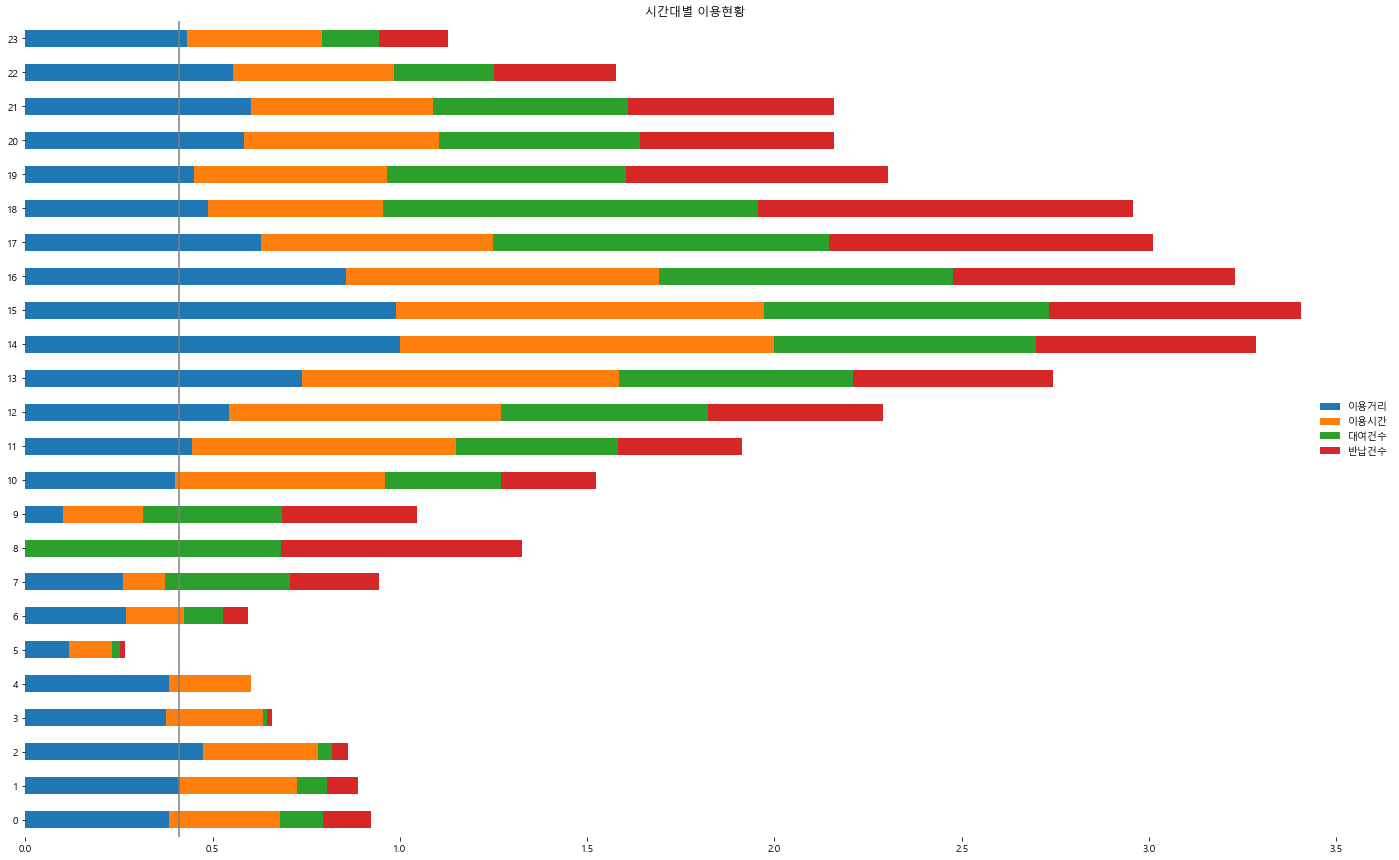

In [192]:
df_new.plot(kind='barh', stacked=True, figsize=(24, 15), title="시간대별 이용현황", rot=0 )
plt.box(False)
plt.legend(frameon=False, loc='center left', bbox_to_anchor=(0.96, 0.5))
plt.ylabel("")
plt.axvline(x=0.41, color='grey')
plt.show()

In [193]:
borrow_name=data['대여 대여소명'].value_counts().head(20)
borrow_name

여의나루역 1번출구 앞         2592
뚝섬유원지역 1번출구 앞        2554
봉림교 교통섬              2345
롯데월드타워(잠실역2번출구 쪽)    2076
마곡나루역 2번 출구          2016
마포구민체육센터 앞           1905
구로디지털단지역 앞           1885
신대방역 2번 출구           1867
영등포구청역 1번출구          1772
마곡나루역 5번출구 뒤편        1756
발산역 1번, 9번 인근 대여소    1720
동방1교                 1708
당산역 10번출구 앞          1702
마곡역교차로               1672
신도림역 1번 출구 앞         1667
옥수역 3번출구             1632
청계천 생태교실 앞           1628
가양역 8번출구             1610
IFC몰                 1535
CJ 드림시티              1533
Name: 대여 대여소명, dtype: int64

In [194]:
return_name=data['반납대여소명'].value_counts().head(20)
return_name

뚝섬유원지역 1번출구 앞        3091
여의나루역 1번출구 앞         2676
봉림교 교통섬              2405
마포구민체육센터 앞           2260
롯데월드타워(잠실역2번출구 쪽)    2084
마곡나루역 2번 출구          1989
구로디지털단지역 앞           1925
신대방역 2번 출구           1914
옥수역 3번출구             1854
발산역 1번, 9번 인근 대여소    1780
청계천 생태교실 앞           1771
영등포구청역 1번출구          1763
당산역 10번출구 앞          1728
마곡역교차로               1696
동방1교                 1690
신도림역 1번 출구 앞         1689
마곡나루역 5번출구 뒤편        1676
오목교역 7번출구 앞          1669
CJ 드림시티              1662
가양역 8번출구             1636
Name: 반납대여소명, dtype: int64

In [195]:
data

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,월,일,대여,반납
0,SPB-53145,2021-01-02 20:50:36,3,중랑센터,0,2021-01-02 21:15:41,668,서울축산농협(장안지점),0,25,0.00,1,2,20,21
1,SPB-53074,2021-01-04 16:02:12,3,중랑센터,0,2021-01-04 16:17:06,668,서울축산농협(장안지점),0,14,0.00,1,4,16,16
2,SPB-50952,2021-01-13 21:02:05,3,중랑센터,0,2021-01-13 21:14:04,668,서울축산농협(장안지점),0,11,1853.99,1,13,21,21
3,SPB-52380,2021-01-14 21:02:55,3,중랑센터,0,2021-01-14 21:13:41,668,서울축산농협(장안지점),0,10,0.00,1,14,21,21
4,SPB-52380,2021-01-18 18:02:08,3,중랑센터,0,2021-01-18 18:15:22,540,군자역 7번출구 베스트샵 앞,0,13,2291.05,1,18,18,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806498,SPB-81270,2021-01-24 20:13:33,9999,상담센터,0,2021-01-24 20:56:28,2908,광운대학교 중앙도서관,99,42,3730.00,1,24,20,20
806499,SPB-39891,2021-01-25 12:10:06,9999,상담센터,0,2021-01-25 12:35:20,626,군자교 서측 녹지대,0,25,3680.00,1,25,12,12
806500,SPB-32679,2021-01-27 14:47:18,9999,상담센터,0,2021-01-27 15:12:45,2299,한전아트센터 앞,0,25,2471.37,1,27,14,15
806501,SPB-80712,2021-01-31 14:39:45,9999,상담센터,0,2021-01-31 15:46:49,175,홍연2교옆,99,67,4050.00,1,31,14,15
